In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_all_lags_please_end.csv')

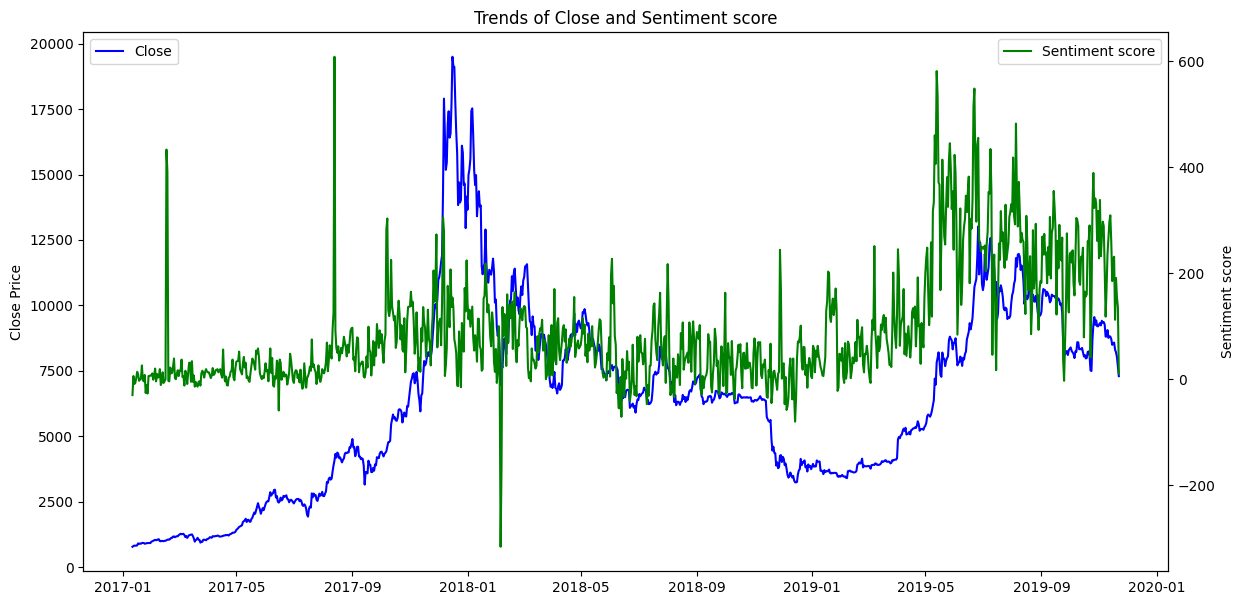

In [45]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot the trends of 'Close' and 'content2'
plt.figure(figsize=(14, 7))

# Plot 'Close' on the primary y-axis
plt.plot(df.index, df['Close'], label='Close', color='blue')
plt.ylabel('Close Price')
plt.legend(loc='upper left')

# Create a secondary y-axis for 'content2'
ax2 = plt.gca().twinx()
ax2.plot(df.index, df['simple_score'], label='Sentiment score', color='green')
ax2.set_ylabel('Sentiment score')
plt.legend(loc='upper right')

# Set the title and labels
plt.title('Trends of Close and Sentiment score')
plt.xlabel('Date')

plt.show()

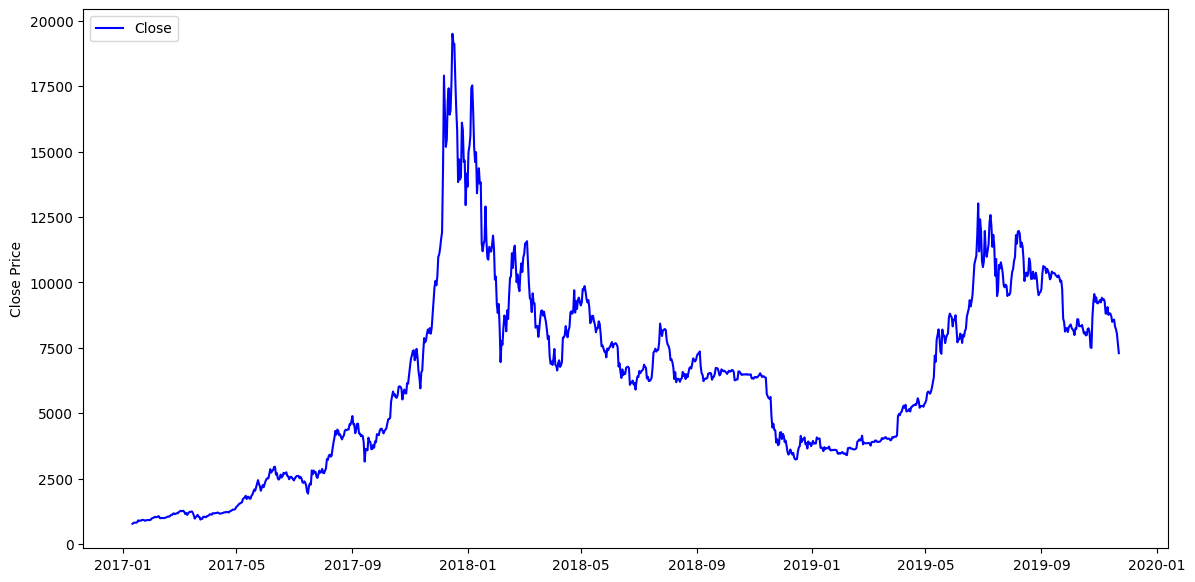

In [24]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot the trends of 'Close' and 'content2'
plt.figure(figsize=(14, 7))

# Plot 'Close' on the primary y-axis
plt.plot(df.index, df['Close'], label='Close', color='blue')
plt.ylabel('Close Price')
plt.legend(loc='upper left')

In [5]:
columns_of_interest = ['Close', 'Volume', 'simple_score', 'content2', 'VADER_sentiment', 'normalized_score', 'VADER_norm']
data_selected = df[columns_of_interest]

# Display basic descriptive statistics for the selected columns
descriptive_stats = data_selected.describe().round(2)
descriptive_stats

,Close,Volume,simple_score,content2,VADER_sentiment,normalized_score,VADER_norm
count,1046.00,1.046000e+03,1046.00,1046.00,1046.00,1046.00,1046.00
mean,6339.05,7.990589e+09,91.98,16.36,82.32,0.01,0.06
std,3571.86,7.653697e+09,108.73,46.67,80.70,0.03,0.04
min,777.76,6.085170e+07,-316.00,-288.30,-23.52,-0.15,-0.07
25%,3662.67,2.180850e+09,15.00,-6.99,24.48,-0.01,0.03
50%,6410.25,5.191245e+09,59.00,4.55,47.67,0.01,0.05
75%,8593.42,1.270925e+10,133.75,26.62,113.28,0.03,0.10
max,19497.40,4.510573e+10,608.00,291.52,309.37,0.15,0.17


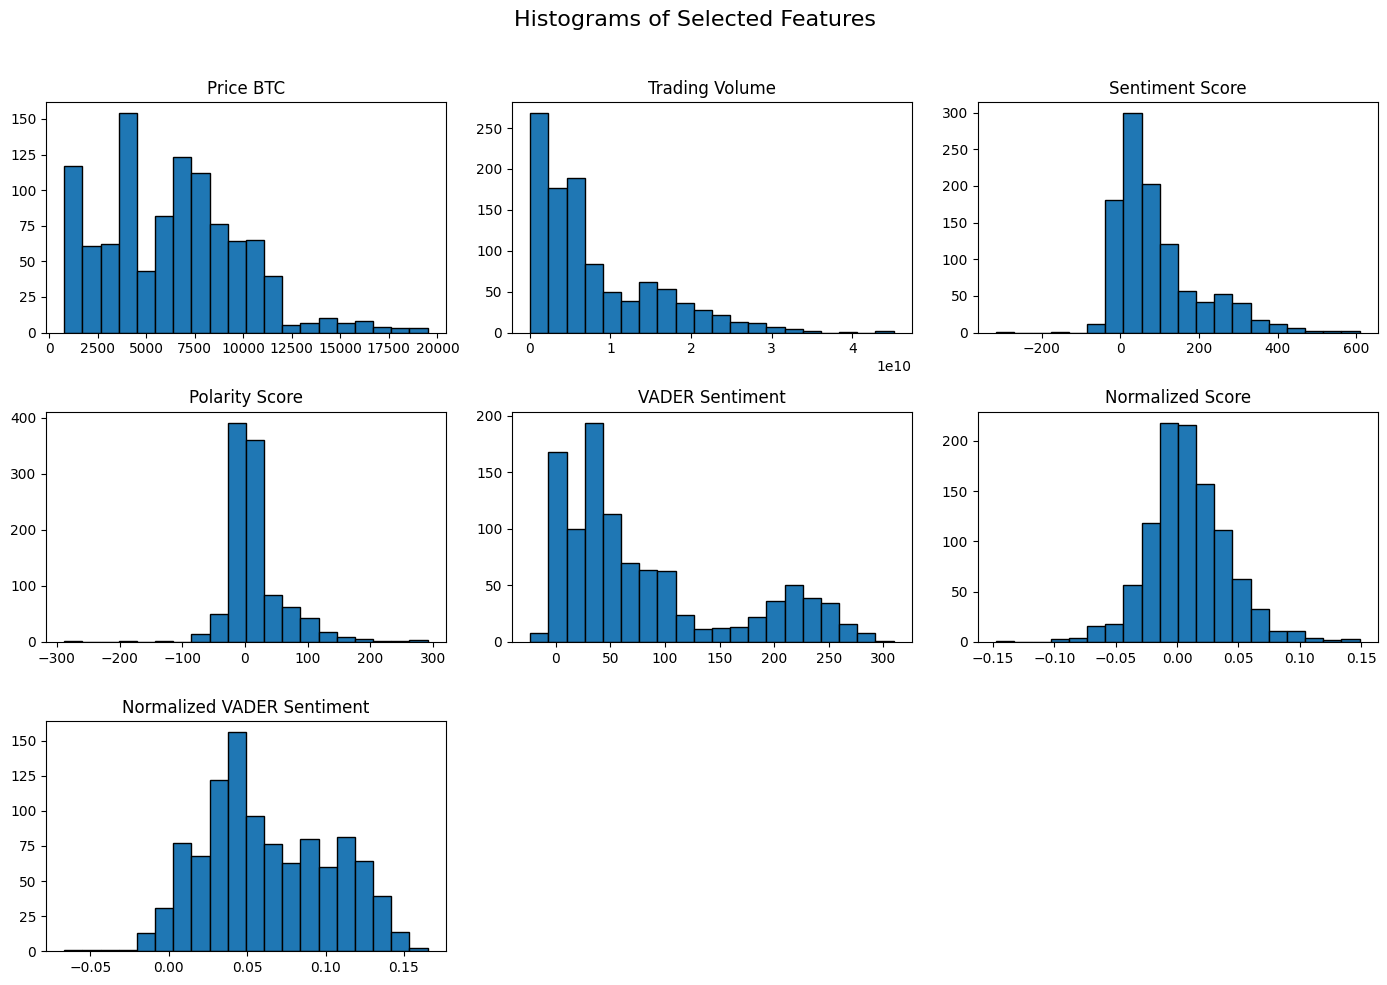

In [10]:
# Assuming data_selected is your DataFrame with the columns mentioned
fig, axs = plt.subplots(3, 3, figsize=(14, 10))  # Adjust the layout to fit your data

# List of columns and their corresponding titles
columns = [
    ('Close', 'Price BTC'),
    ('Volume', 'Trading Volume'),
    ('simple_score', 'Sentiment Score'),
    ('content2', 'Polarity Score'),
    ('VADER_sentiment', 'VADER Sentiment'),
    ('normalized_score', 'Normalized Score'),
    ('VADER_norm', 'Normalized VADER Sentiment')
]

# Remove raster lines
for ax in axs.flatten():
    ax.grid(False)

# Plot each histogram with custom titles
for i, (column, title) in enumerate(columns):
    ax = axs[i // 3, i % 3]  # Get the correct subplot
    ax.hist(data_selected[column], bins=20, edgecolor='black')
    ax.set_title(title)

if len(columns) < len(axs.flatten()):
    for j in range(len(columns), len(axs.flatten())):
        fig.delaxes(axs.flatten()[j])

# Set the overall title
plt.suptitle('Histograms of Selected Features', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.show()

In [ ]:
#show the amount of negative and positive values for 'VADER_sentiment', 'content2' and 'simple_score'
columns_to_check = ['simple_score', 'VADER_sentiment', 'content2']

positive_counts = {}
negative_counts = {}

for column in columns_to_check:
    positive_counts[column] = len(df[df[column] > 0])
    negative_counts[column] = len(df[df[column] < 0])

# Print the counts
for column in columns_to_check:
    print(f"Column: {column}")
    print(f"Positive count: {positive_counts[column]}, Negative count: {negative_counts[column]}")

# If you want to print all counts together
print("\nAll Positive Counts:", positive_counts)
print("All Negative Counts:", negative_counts)

In [ ]:
#create relational scatter plots
# Create scatter plots
fig, axes = plt.subplots(7, 1, figsize=(10, 20))

# Scatter plot of simple_score vs Close
axes[0].scatter(df['simple_score'], df['Close'], alpha=0.5)
axes[0].set_title('sentiment score vs closing price')
axes[0].set_xlabel('sentiment_score')
axes[0].set_ylabel('Close')

# Scatter plot of content2 vs Close
axes[1].scatter(df['content2'], df['Close'], alpha=0.5)
axes[1].set_title('polarity score vs closing price')
axes[1].set_xlabel('polarity_score')
axes[1].set_ylabel('Close')

# Scatter plot of Volume vs Close
axes[2].scatter(df['Volume'], df['Close'], alpha=0.5)
axes[2].set_title('Volume vs closing price')
axes[2].set_xlabel('Volume')
axes[2].set_ylabel('Close')

# Scatter plot of normalized_score vs Close
axes[3].scatter(df['normalized_score'], df['Close'], alpha=0.5)
axes[3].set_title('normalised polarity score vs closing price')
axes[3].set_xlabel('normalised polarity score')
axes[3].set_ylabel('Close')

# Scatter plot of previous_close vs Close
axes[4].scatter(df['previous_close'], df['Close'], alpha=0.5)
axes[4].set_title('previous closing price vs closing price')
axes[4].set_xlabel('previous close')
axes[4].set_ylabel('Close')

# Scatter plot of mean_simple_score vs Close
axes[5].scatter(df['VADER_norm'], df['Close'], alpha=0.5)
axes[5].set_title('VADER normalised score vs closing price')
axes[5].set_xlabel('VADER normalised score')
axes[5].set_ylabel('Close')

axes[6].scatter(df['VADER_sentiment'], df['Close'], alpha=0.5)
axes[6].set_title('VADER polarity score vs closing price')
axes[6].set_xlabel('VADER score')
axes[6].set_ylabel('Close')

plt.tight_layout()
plt.show()

In [ ]:
#create correlation matrix
corr_matrix = df.corr()
corr_matrix